# Neural Network Mortgage Prepayment Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import time
import imp
import os
import os, os.path
import datetime as dt
import dateutil.parser as dp
import dill
import datetime as dt

%matplotlib inline

## Load data from csv files in the ./data directory

In [2]:
if True:
    # load data from csv files
    df = pd.DataFrame()
    for root, dirs, files in os.walk("../30y fixed rate data/fnm/conforming/clean data"):
        for name in files:
            file_name = os.path.join(root, name)
            if 'pools_part' in file_name:
                print(file_name)
                if len(df) > 0:
                    df = pd.concat([df,pd.read_csv(file_name)])
                else:
                    df = pd.read_csv(file_name)        

    model_name = 'nn-ppm-from-csv.h5' # for saving a model later

else:
    dill.load_session('notebook_env_all_3_dfs.db')

    print('Loaded data as is:')
    print('attr_df.shape   = ', attr_df.shape)
    print('geo_df.shape    = ', geo_df.shape)
    print('seller_df.shape = ', seller_df.shape)

    nloans = 250
    attr_df = attr_df[attr_df['cnloans']>=nloans]

    print('Data size after filtering for >= 250 loans:')
    print(f'attr_df.shape = {attr_df.shape}')

    geo_df.drop('poolno',axis=1,inplace=True)
    df = pd.merge(attr_df,geo_df,on=['cusip','asofdate'],how='left')

    seller_df.drop('poolno',axis=1,inplace=True)
    df = pd.merge(df,seller_df,on=['cusip','asofdate'],how='left')

    df.fillna(0,inplace=True)

    model_name = 'nn-ppm-dill-data.h5' # for saving a model later

df['Seasonality'] = df['asofdate'].apply(lambda x: int(str(x)[-2:]))

print('df.shape = ', df.shape)

../30y fixed rate data/fnm/conforming/clean data\pools_part1.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part10.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part100.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part101.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part102.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part103.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part104.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part105.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part106.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part107.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part108.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part109.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part11.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part110.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part111.csv

C:\Users\YuriTurygin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


../30y fixed rate data/fnm/conforming/clean data\pools_part20.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part200.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part201.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part202.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part203.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part204.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part205.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part206.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part207.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part208.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part209.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part21.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part210.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part211.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part212.c

../30y fixed rate data/fnm/conforming/clean data\pools_part310.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part311.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part312.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part313.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part314.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part315.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part316.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part317.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part318.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part319.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part32.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part320.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part321.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part322.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part323.

../30y fixed rate data/fnm/conforming/clean data\pools_part421.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part422.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part423.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part424.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part425.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part426.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part427.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part428.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part429.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part43.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part430.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part431.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part432.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part44.csv
../30y fixed rate data/fnm/conforming/clean data\pools_part45.cs

### Make sure all the fields (except cusip and poolsno) are numerical and there are no NAs

In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12954704 entries, 0 to 29999
Data columns (total 111 columns):
 #   Column              Non-Null Count     Dtype  
---  ------              --------------     -----  
 0   poolno              12954704 non-null  object 
 1   asofdate            12954704 non-null  int64  
 2   cusip               12954704 non-null  object 
 3   spread              12954704 non-null  float64
 4   SMM                 12954704 non-null  float64
 5   DayCount            12954704 non-null  float64
 6   OBal                12954704 non-null  float64
 7   CBal                12954704 non-null  float64
 8   factor              12954704 non-null  float64
 9   Coupon              12954704 non-null  float64
 10  Wac                 12954704 non-null  float64
 11  Wam                 12954704 non-null  float64
 12  Age                 12954704 non-null  float64
 13  aols                12954704 non-null  float64
 14  waols               12954704 non-null  float64
 15

In [4]:
df.head()

,poolno,asofdate,cusip,spread,SMM,DayCount,OBal,CBal,factor,Coupon,...,SellerPct_NATIONST,SellerPct_NRESM,SellerPct_PNYMAC,SellerPct_PILOSI,SellerPct_QUICK,SellerPct_REG,SellerPct_RMSC,SellerPct_UNSHFI,SellerPct_WFHM,Seasonality
0,877118,201012,31409SPB0,-19.5,0.0029,22.0,58535566.0,58449322.63,99.852665,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
1,877118,201101,31409SPB0,-44.0,0.0247,20.0,58535566.0,58350056.36,99.683082,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,877118,201102,31409SPB0,-66.8,0.1765,19.0,58535566.0,58162116.05,99.362012,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,877118,201103,31409SPB0,-78.7,0.8830,23.0,58535566.0,57564063.94,98.340322,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,877118,201104,31409SPB0,-82.7,1.0095,21.0,58535566.0,56898607.41,97.203480,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [8]:
df.to_pickle('../conv_30yr.pkl')

In [ ]:
# df = pd.read_pickle("../conv_30yr.pkl")

In [16]:
print('df.shape = ', df.shape)

df.shape =  (12954704, 111)


## Model features selection and defining train/test split

* In this section we select which features (columns) are to be used in the model and define a test-train split. 

In [17]:
model_columns = ['asofdate',
                 'SMM',
                 'spread',
                 'DayCount','factor',
                 'Wac','Wam','Age','aols','waols','CSato',
                 'oltv','cltv','ocltv','ccltv',
                 'fico',
                 '%CashWindow','%Majors',
                 'PurpPct_purchase','PurpPct_refi',
                 'PctChannel_Broker','PctChannel_Corr','PctChannel_Retail',
                 'OccPct_investor','OccPct_owner','PropUnitsPct_2-4',
                 'Seasonality',
                
                 # features showing geographical composition of a pool
                 'StatePct_AK','StatePct_AL','StatePct_AR','StatePct_AZ','StatePct_CA','StatePct_CO','StatePct_CT',
                 'StatePct_DC','StatePct_DE','StatePct_FL','StatePct_GA','StatePct_GU','StatePct_HI','StatePct_IA',
                 'StatePct_ID','StatePct_IL','StatePct_IN','StatePct_KS','StatePct_KY','StatePct_LA','StatePct_MA',
                 'StatePct_MD','StatePct_ME','StatePct_MI','StatePct_MN','StatePct_MO','StatePct_MS','StatePct_MT',
                 'StatePct_NC','StatePct_ND','StatePct_NE','StatePct_NH','StatePct_NJ','StatePct_NM','StatePct_NV',
                 'StatePct_NY','StatePct_OH','StatePct_OK','StatePct_OR','StatePct_PA','StatePct_PR','StatePct_RI',
                 'StatePct_SC','StatePct_SD','StatePct_TN','StatePct_TX','StatePct_UT','StatePct_VA','StatePct_VI',
                 'StatePct_VT','StatePct_WA','StatePct_WI','StatePct_WV','StatePct_WY',
                 
                 # features showing originator composition of a pool
                 'SellerPct_AMRHT','SellerPct_ALS','SellerPct_CAFULL','SellerPct_CNTL','SellerPct_CITIZ',
                 'SellerPct_53','SellerPct_FIR','SellerPct_FRDOM','SellerPct_GUILD','SellerPct_CHASE',
                 'SellerPct_LLSL','SellerPct_MATRX','SellerPct_NCM','SellerPct_NATIONST','SellerPct_NRESM',
                 'SellerPct_PNYMAC','SellerPct_PILOSI','SellerPct_QUICK','SellerPct_REG','SellerPct_RMSC',
                 'SellerPct_UNSHFI','SellerPct_WFHM']

dfm = df[df['cnloans'] >= 250][model_columns]

print(f'dfm.shape = {dfm.shape}')

dfm.head()

dfm.shape = (716104, 103)


,asofdate,SMM,spread,DayCount,factor,Wac,Wam,Age,aols,waols,...,SellerPct_NCM,SellerPct_NATIONST,SellerPct_NRESM,SellerPct_PNYMAC,SellerPct_PILOSI,SellerPct_QUICK,SellerPct_REG,SellerPct_RMSC,SellerPct_UNSHFI,SellerPct_WFHM
5599,201002,0.1184,-2.7,19.0,99.633659,4.953,355.0,2.0,257940.0,257940.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5600,201003,0.2017,-5.7,23.0,99.308870,4.953,354.0,3.0,257971.0,257971.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5601,201004,0.0811,-2.6,22.0,99.104151,4.953,353.0,4.0,257930.0,257930.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5602,201005,0.3476,-7.9,20.0,98.635394,4.954,352.0,5.0,257972.0,257972.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5603,201006,0.6786,-4.0,22.0,97.842115,4.953,350.0,6.0,257650.0,257650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dummies = pd.get_dummies(dfm['Seasonality'],drop_first=True)
dfm = dfm.drop('Seasonality',axis=1)
dfm = pd.concat([dfm,dummies],axis=1)

print(f'dfm.shape = {dfm.shape}')

dfm.shape = (716104, 113)


In [19]:
# define train/test split
# from sklearn.model_selection import train_test_split

# X = dfm.drop(['SMM','asofdate'],axis=1)
# y = dfm['SMM'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

data_cutoff = 202010

dfm_train = dfm[dfm['asofdate'] <  data_cutoff]
dfm_test  = dfm[dfm['asofdate'] >= data_cutoff]

X_train = dfm_train.drop(['SMM','asofdate'],axis=1).values
y_train = dfm_train['SMM'].values

X_test = dfm_test.drop(['SMM','asofdate'],axis=1).values
y_test = dfm_test['SMM'].values

print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print('\n')
print(f'X_test.shape  = {X_test.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (704641, 111)
y_train.shape = (704641,)


X_test.shape  = (11463, 111)
y_test.shape  = (11463,)


## FF neural-network mortgage prepayment model

* In this section we fit the model to train data

In [20]:
# scale train/test data because buiding a neural net
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [22]:
model = Sequential()

#input layer / first hidden layer
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
#model.add(Dropout(0.3))
model.add(Dropout(0.5))

# hidden layers
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
# model.add(Dropout(0.5))

#output layer
model.add(Dense(1, activation='relu')) # no activation means linear activation a(x)=x
#model.add(Dense(1)) # no activation means linear activation a(x)=x

model.compile(optimizer='adam', loss='mse')
# model.compile(optimizer='rmsprop', loss='mse')

In [23]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=1024,
          epochs=50)

Train on 704641 samples, validate on 11463 samples
Epoch 1/50
704641/704641 [==============================] - 13s 18us/sample - loss: 0.6971 - val_loss: 3.1482
Epoch 2/50
704641/704641 [==============================] - 12s 17us/sample - loss: 0.4850 - val_loss: 3.7767
Epoch 3/50
704641/704641 [==============================] - 12s 18us/sample - loss: 0.4553 - val_loss: 2.8570
Epoch 4/50
704641/704641 [==============================] - 12s 17us/sample - loss: 0.4397 - val_loss: 2.9598
Epoch 5/50
704641/704641 [==============================] - 12s 17us/sample - loss: 0.4285 - val_loss: 2.4897
Epoch 6/50
704641/704641 [==============================] - 12s 17us/sample - loss: 0.4214 - val_loss: 2.9022
Epoch 7/50
704641/704641 [==============================] - 12s 17us/sample - loss: 0.4176 - val_loss: 2.3685
Epoch 8/50
704641/704641 [==============================] - 12s 17us/sample - loss: 0.4120 - val_loss: 2.2450
Epoch 9/50
704641/704641 [==============================] - 12s 17us/

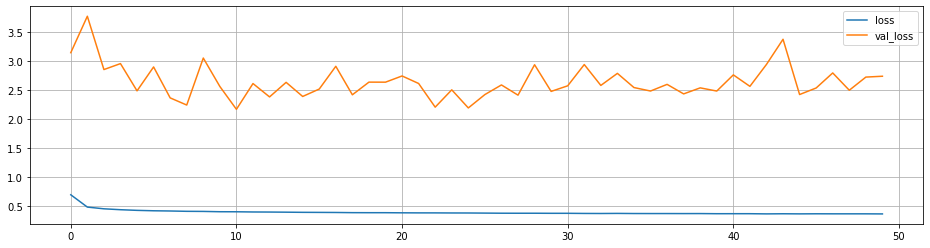

In [24]:
losses = pd.DataFrame(model.history.history)

losses.plot(figsize=(16,4),grid=True)

## Model Evaluation and Validation

* to be updated

### Validation reports

In [25]:
def valReport(dframe,graphTitle='',lcoup=2.5,hcoup=5,fsize=(24,24)):

    ppm_table = dframe[['CBal','model SMM x CBal','SMM x CBal','Coupon','ppmdate']].groupby(['Coupon','ppmdate']).sum()

    ppm_table['SMM'] = ppm_table['SMM x CBal']/ppm_table['CBal']
    ppm_table['CPR'] = 100*(1-(1-ppm_table['SMM']/100)**12)

    ppm_table['model SMM'] = ppm_table['model SMM x CBal']/ppm_table['CBal']
    ppm_table['model CPR'] = 100*(1-(1-ppm_table['model SMM']/100)**12)
    
    fig = plt.figure(figsize=fsize)
    
    plt.title(graphTitle)

    numOfsubgraphs = int((hcoup-lcoup)*2 + 1)

    for i in range(numOfsubgraphs):
        ax = fig.add_subplot(numOfsubgraphs,1,i+1)
        coupon = lcoup + i*0.5
        if ('CPR',coupon) in ppm_table.unstack(level=0).columns:
            ppm_table.unstack(level=0)[[('CPR',coupon),('model CPR',coupon)]].plot(ax=ax,grid=True)
            ax.legend()

In [26]:
def rmse_by_coupon(dframe,lcoup=2.5,hcoup=5,col_name='RMSE (CPR)'):
    
    ppm_table = dframe[['CBal','model SMM x CBal','SMM x CBal','Coupon','ppmdate']].groupby(['Coupon','ppmdate']).sum()

    ppm_table['SMM'] = ppm_table['SMM x CBal']/ppm_table['CBal']
    ppm_table['CPR'] = 100*(1-(1-ppm_table['SMM']/100)**12)

    ppm_table['model SMM'] = ppm_table['model SMM x CBal']/ppm_table['CBal']
    ppm_table['model CPR'] = 100*(1-(1-ppm_table['model SMM']/100)**12)
    
    RMSE_by_coupon = dict()
    
    for i in range(int((hcoup-lcoup)*2 + 1)):
        coupon = lcoup + i*0.5
        if ('CPR',coupon) in ppm_table.unstack(level=0).columns:
            act_vs_pred = ppm_table.unstack(level=0)[[('CPR',coupon),('model CPR',coupon)]].dropna()
            RMSE_by_coupon[coupon] = np.sqrt(mean_squared_error(act_vs_pred[('CPR',coupon)],act_vs_pred[('model CPR'),coupon]))
            
    RMSE_by_coupon = pd.DataFrame({col_name:list(RMSE_by_coupon.values())},index=RMSE_by_coupon.keys())
    RMSE_by_coupon.index.name = 'Coupon'
    
    return RMSE_by_coupon    

### Validation of a neural-network model on a pool by pool basis.

* to be updated

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

test_predictions = model.predict(X_test)
print(f'(test set) mean absolute error       = {np.round(mean_absolute_error(y_test,test_predictions),4)}')
print(f'(test set) mean sq root sq error     = {np.round(np.sqrt(mean_squared_error(y_test,test_predictions)),4)}')
print(f'(test set) explained variance score  = {np.round(explained_variance_score(y_test,test_predictions),4)}')
print('\n')
train_predictions = model.predict(X_train)
print(f'(train set) mean absolute error      = {np.round(mean_absolute_error(y_train,train_predictions),4)}')
print(f'(train set) mean sq root sq error    = {np.round(np.sqrt(mean_squared_error(y_train,train_predictions)),4)}')
print(f'(train set) explained variance score = {np.round(explained_variance_score(y_train,train_predictions),4)}')

(test set) mean absolute error       = 1.2094
(test set) mean sq root sq error     = 1.6558
(test set) explained variance score  = 0.6043


(train set) mean absolute error      = 0.4185
(train set) mean sq root sq error    = 0.5775
(train set) explained variance score = 0.7515


In [ ]:
plt.scatter(y_test,test_predictions)
plt.xlabel('actuals')
plt.ylabel('model predictions')
plt.title('actual vs. predicted (test set)')
plt.plot(y_test,y_test,'r'); plt.grid()

In [ ]:
plt.scatter(y_train,train_predictions)
plt.xlabel('actuals')
plt.ylabel('model predictions')
plt.title('actual vs. predicted (train set)')
plt.plot(y_train,y_train,'r'); plt.grid()

### Validation of a neural network model on large populations of pools/loans

* Here we examine model performance on large populations of loans

In [28]:
if 'asofdate' in dfm.columns:
    df['model SMM'] = model.predict(scaler.transform(dfm.drop(['SMM','asofdate'],axis=1)))
else:
    df['model SMM'] = model.predict(scaler.transform(dfm.drop('SMM',axis=1)))

ValueError: Length of values does not match length of index

In [ ]:
df['SMM x CBal'] = df['SMM']*df['CBal']
df['model SMM x CBal'] = df['model SMM']*df['CBal']
df['ppmdate'] = df['asofdate'].apply(lambda x: dt.date(int(str(x)[:4]),int(str(x)[-2:]),1))
df['Vintage'] = df['pool_issue_month'].apply(lambda x: int(str(x)[:4]))

In [ ]:
valReport(df,graphTitle='2010 thru 2020 Originations by Coupon',fsize=(24,12))

In [ ]:
np.round(rmse_by_coupon(df[df['asofdate']>=data_cutoff],col_name='2010 - 2020 Vintages NN RMSE (CPR)'),2)

In [ ]:
valReport(df[df['waols'] <= 200000],graphTitle='2010 thru 2020 Loan Balace Originations by Coupon',fsize=(24,12))

In [ ]:
np.round(rmse_by_coupon(df[(df['asofdate']>=data_cutoff) & (df['waols'] <= 200000)],col_name='200k max NN RMSE (CPR)'),2)

In [ ]:
for vintage in [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]:

    valReport(df[df['Vintage'] == vintage],graphTitle=f'{vintage} Originations by Coupon',fsize=(24,12))

In [ ]:
for vintage in [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]:

    print(np.round(rmse_by_coupon(df[(df['asofdate']>=data_cutoff) & (df['Vintage'] == vintage)],col_name=f'{vintage} NN RMSE (CPR)'),2))
    print('\n')

In [ ]:
valReport(df[(df['%CashWindow'] == 100) & (df['Vintage'] > 2009)],graphTitle='Cash Window pools prepayments by Coupon',fsize=(24,12),lcoup=2.5,hcoup=5)

In [ ]:
np.round(rmse_by_coupon(df[(df['asofdate']>=data_cutoff) & (df['%CashWindow'] == 100)],col_name='Cash Window - NN RMSE (CPR)'),2)

In [ ]:
valReport(df[(df['OccPct_investor'] > 99) & (df['Vintage'] > 2009)],graphTitle='Investor pools prepayments by Coupon',fsize=(24,12),lcoup=3,hcoup=5.5)

In [ ]:
np.round(rmse_by_coupon(df[(df['asofdate']>=data_cutoff) & (df['OccPct_investor'] > 99)],col_name='Investor - NN RMSE (CPR)'),2)

In [ ]:
valReport(df[(df['PctChannel_Retail'] > 99) & (df['Vintage'] > 2009)],graphTitle='Retail pools prepayments by Coupon',fsize=(24,12),lcoup=3,hcoup=5.5)

In [ ]:
np.round(rmse_by_coupon(df[(df['asofdate']>=data_cutoff) & (df['PctChannel_Retail'] > 99)],col_name='Retail - NN RMSE (CPR)'),2)

### Save the neural network prepayment model in .h5 format

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_name

#### Uncomment the line below if you would like to save

In [ ]:
# model.save(model_name)

#### Uncomment the line below if you would like to load the model saved in Git repository

In [ ]:
# model = load_model('nn-ppm-from-csv.h5')

#### Section below is still under development

In [ ]:
# import kerastuner as kt 

In [ ]:
# def model_builder(hp):

#     model = Sequential()
    
#     #input layer / first hidden layer

#     first_layer_neurons      = hp.Int('layer_1_units', min_value=32, max_value = 1024, step = 32)
#     first_layer_dropout_rate = hp.Float('layer_1_dropout_rate', min_value = 0, max_value = 0.5, step = 0.1)

#     model.add(Dense(first_layer_neurons, input_dim=X_train.shape[1], activation='relu'))
#     model.add(Dropout(first_layer_dropout_rate))

#     # 2nd layer
#     second_layer_neurons      = hp.Int('layer_2_units', min_value=128, max_value = 512, step = 32)
#     second_layer_dropout_rate = hp.Float('layer_2_dropout_rate', min_value = 0, max_value = 0.5, step = 0.1)

#     model.add(Dense(second_layer_neurons, activation='relu'))
#     model.add(Dropout(second_layer_dropout_rate))

#     # 3rd layer
#     third_layer_neurons      = hp.Int('layer_3_units', min_value=64, max_value = 256, step = 32)
#     third_layer_dropout_rate = hp.Float('layer_3_dropout_rate', min_value = 0, max_value = 0.5, step = 0.1)

#     model.add(Dense(third_layer_neurons, activation='relu'))
#     model.add(Dropout(third_layer_dropout_rate))

#     # 4th layer
#     forth_layer_neurons      = hp.Int('layer_4_units', min_value=32, max_value = 128, step = 32)
#     forth_layer_dropout_rate = hp.Float('layer_4_dropout_rate', min_value = 0, max_value = 0.5, step = 0.1)

#     model.add(Dense(forth_layer_neurons, activation='relu'))
#     model.add(Dropout(forth_layer_dropout_rate))

#     #output layer
#     model.add(Dense(1, activation='relu')) # relu activation is perfect here, because SMM cannot be negative

#     model.compile(optimizer='adam', loss='mse')
#     #model.compile(optimizer='rmsprop', loss='mse')    

#     return model

In [ ]:
# tuner = kt.Hyperband(model_builder,
#                      objective='val_loss',
#                      max_epochs=10,
#                      hyperband_iterations=2,
#                      directory=os.path.normpath('C:/'),
#                      project_name='nn_ppm_model-' + dt.datetime.now().strftime('%Y-%M-%d-%H-%M-%S'))

In [ ]:
# tuner.search(x=X_train,
#              y=y_train,
#              validation_data=(X_test,y_test),
#              batch_size=1024,
#              epochs=10)

In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [ ]:
# model = tuner.hypermodel.build(best_hps)

In [ ]:
# model.summary()

In [ ]:
# tuner.results_summary()